## Tarea 01: Preprocesamiento de datos del dataset de diabetes
### Eliuth Montiel Navarrete

In [56]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

<h3>1.- Carga de datos</h3>

In [57]:
#a) Importación del dataset.
df = pd.read_csv('diabetes.csv')

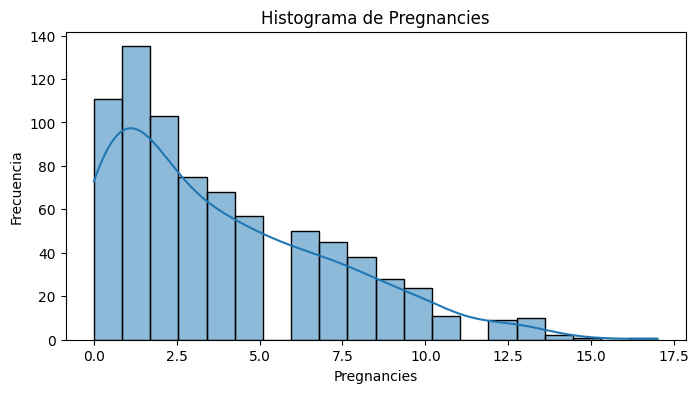

None


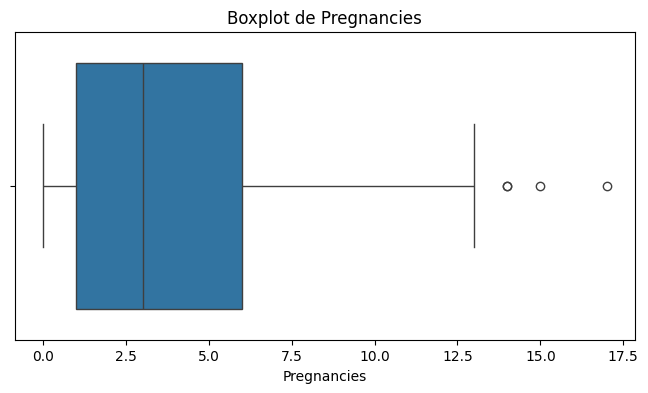

None


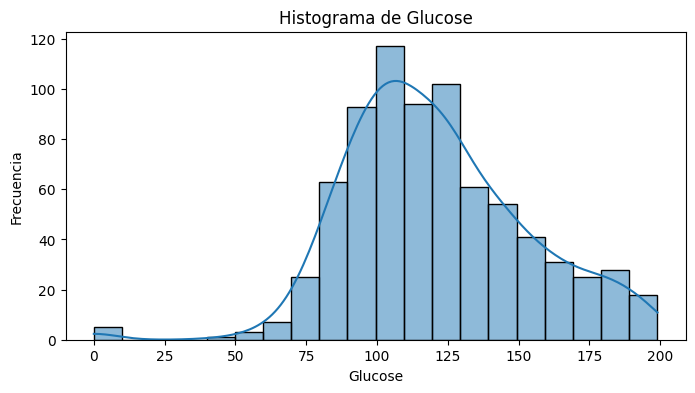

None


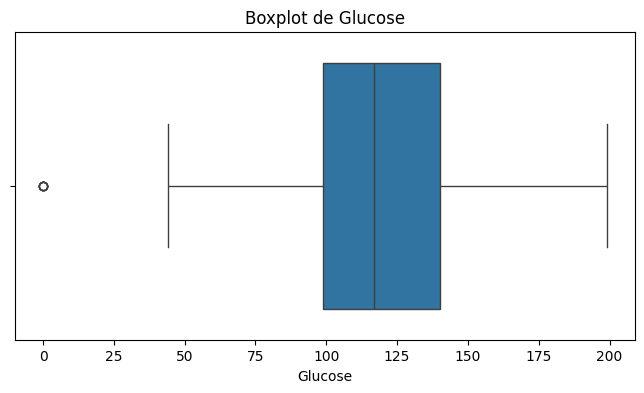

None


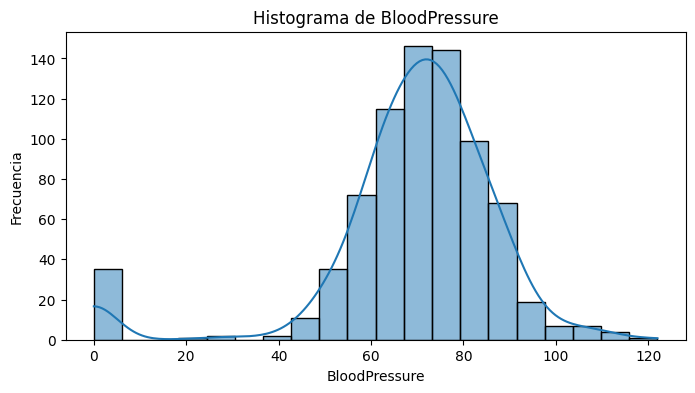

None


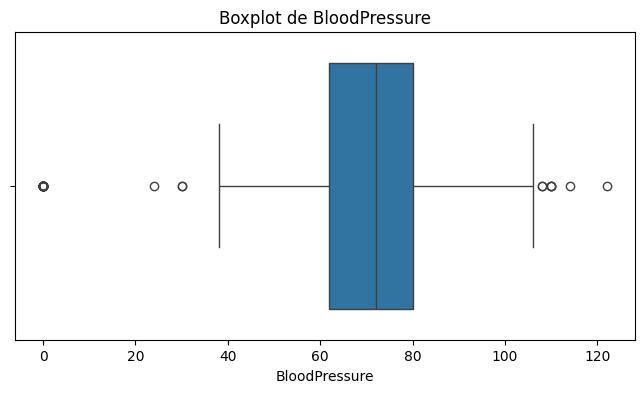

None


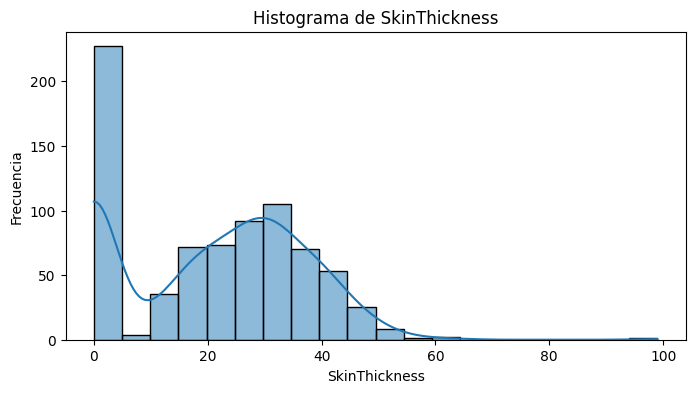

None


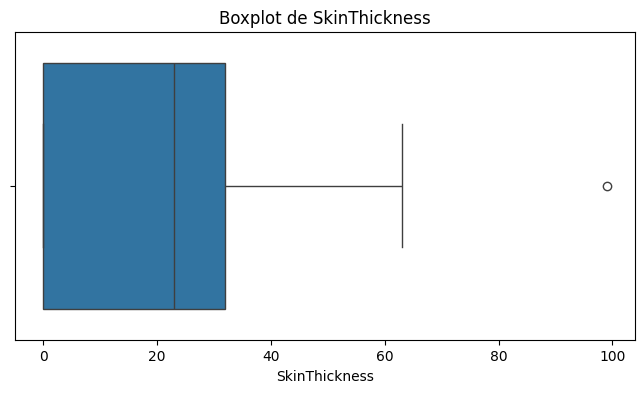

None


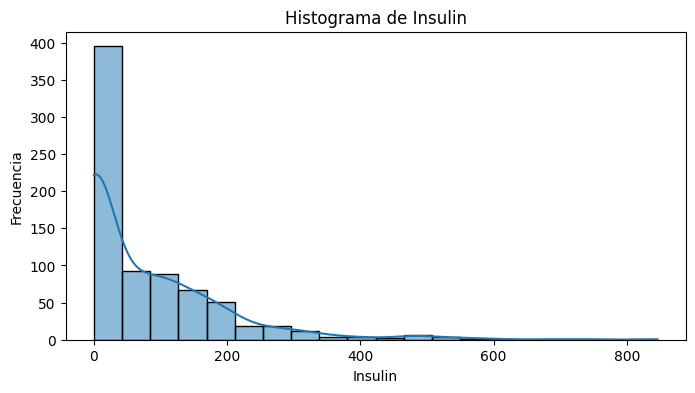

None


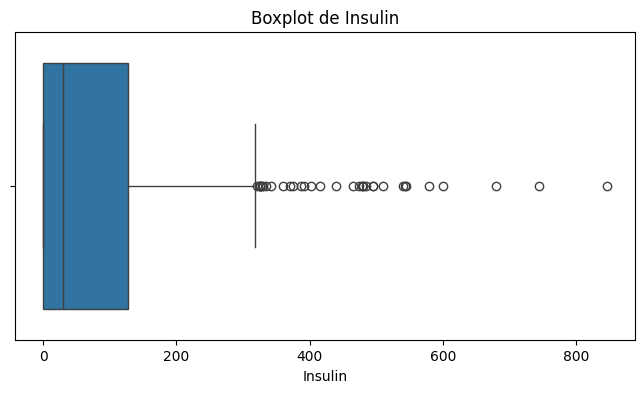

None


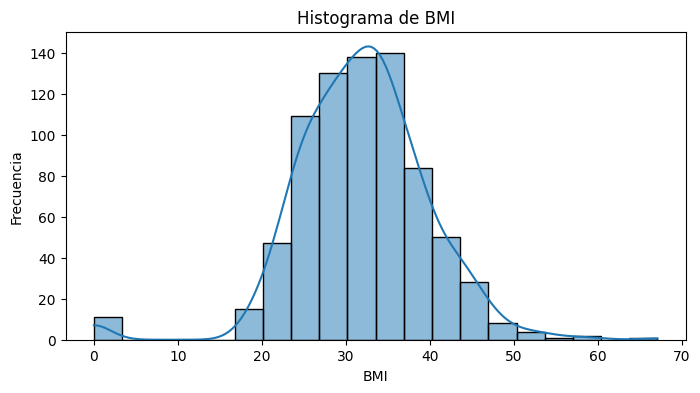

None


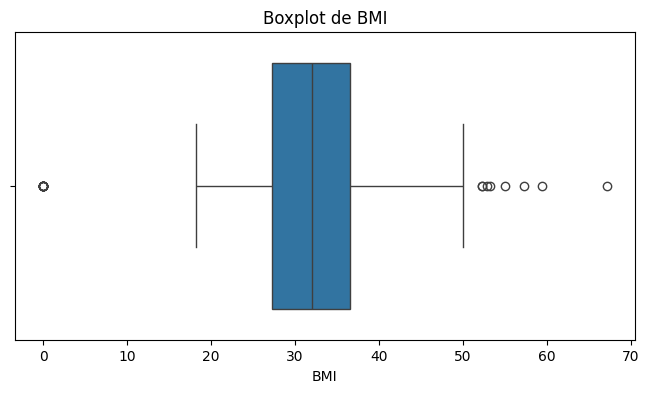

None


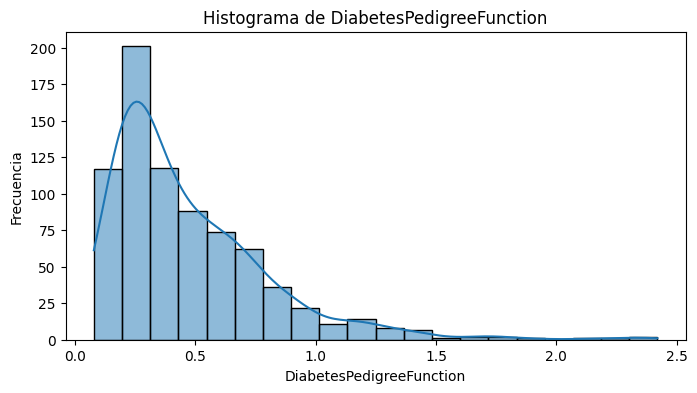

None


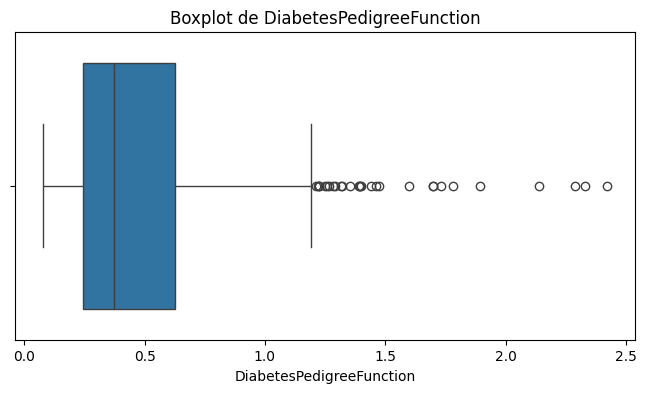

None


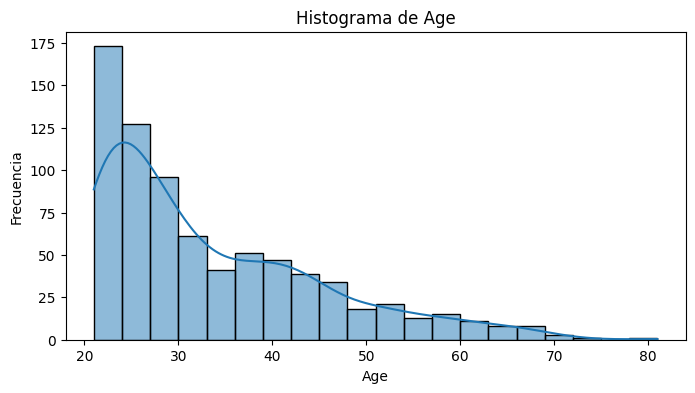

None


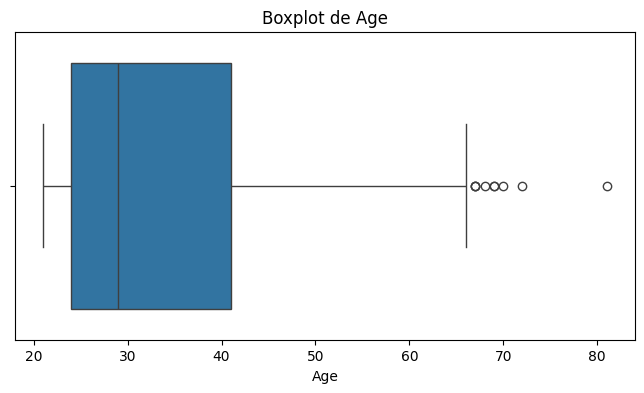

None


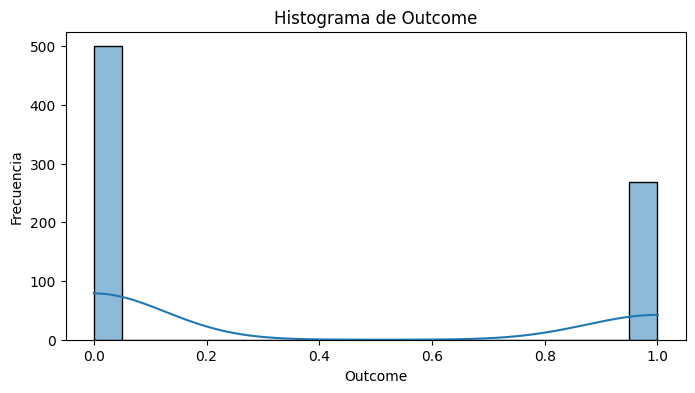

None


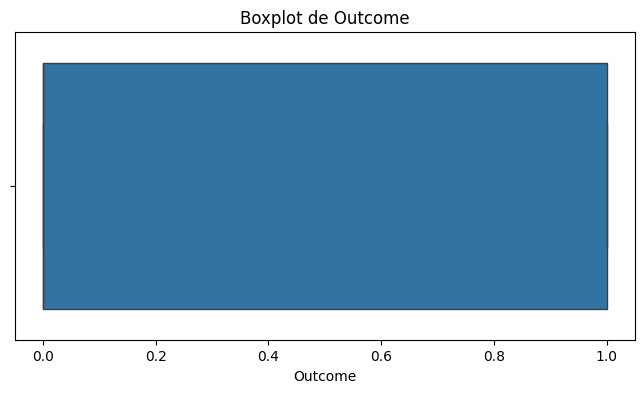

None


In [58]:
#b) Exploración inicial.
num_cols = df.select_dtypes(include=["float64","int64"]).columns.tolist()
for i in num_cols:
    #Histogramas.
    plt.figure(figsize=(8,4))
    sns.histplot(df[i], bins = 20, kde = True)
    plt.title(f'Histograma de {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    print(plt.show())

    #Boxplots.
    plt.figure(figsize=(8,4))
    sns.boxplot(x=i, data=df)
    plt.title(f'Boxplot de {i}')
    print(plt.show())

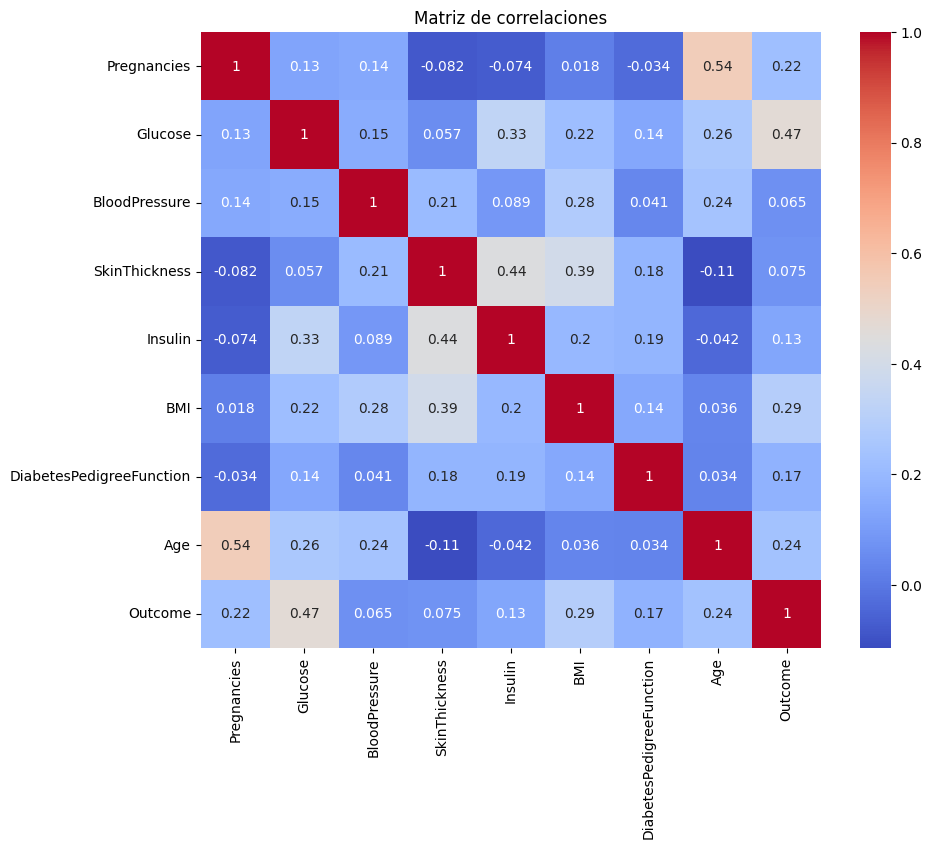

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlaciones')
plt.show()

In [60]:
#c) Mostrar las primeras filas (head).
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
#d) Describir las variables (describe e info).
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h3>2.- Análisis de valores faltantes</h3>

In [63]:
#a) Identificar valores nulos.

En el paso anterior podemos observar que no hay valores nulos.

In [64]:
#b) Justificar si se imputarán o eliminarán esas filas o columnas.

No se tienen valores nulos en ninguna de las columnas ni filas del dataset, el único dato que podría considerarse sensible es la edad de las personas, sin embargo en un ambiente médico esta onformación es bastante importante por lo cual no se realizará ninguna imputación ni eliminación de filas ni columnas.

<h3>3.- Detección y tratamiento de Outliers</h3>

In [65]:
#a) Aplicar métodos estadísticos (IQR) y/o algorítmicos (opcional: Isolation Forest) para identificar outliers.
col_outliers = []
for i in num_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower) | (df[i] > upper)]
    

    out = outliers.shape[0]
    if out > 0:
        col_outliers.append(i)
print(col_outliers)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [66]:
#b) Justificar si se imputarán, eliminarán o dejarán esas filas/columnas.
imputer_media = SimpleImputer(strategy="mean")
df["Pregnancies"] = imputer_media.fit_transform(df[["Pregnancies"]])

imputer_media = SimpleImputer(strategy="mean")
df["Glucose"] = imputer_media.fit_transform(df[["Glucose"]])

imputer_media = SimpleImputer(strategy="mean")
df["BloodPressure"] = imputer_media.fit_transform(df[["BloodPressure"]])

imputer_media = SimpleImputer(strategy="mean")
df["SkinThickness"] = imputer_media.fit_transform(df[["SkinThickness"]])

Todas las columnas poseen valores atípicos, estos valores son importantes ya que tienen relación con la predicción de la diabetes, sin embargo ciertas columnas tiene pocos valores atípicos, por lo que se les aplicará la media a estos.

<h3>4.- Escalado de datos</h3>

In [67]:
#a) Aplicar técnicas de escalado.
rs = RobustScaler()
df[['DiabetesPedigreeFunction']] = rs.fit_transform(df[['DiabetesPedigreeFunction']])

In [68]:
#b) Elegir cuál usar en el dataset final y justificar la elección.

Se utilizará el escalado robusto ya que contamos con valores con variables numéricas que contienen una gran cantidad de datos atípicos, este escalado solo se aplicará a la columna DiabetesPedigreeFunction ya que es la propiedad cuya escala está más alejada de las demás.

<h3>5.- Guardar el dataset limpio y escalado</h3>

In [69]:
#a) Exportar el dataset preprocesado como CSV para futuros ejercicios de modelado.
df.to_csv("diabetes_preprocesado.csv",index=False)